<div style="color: white; background-color: BLACK; font-size: 65px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
25px; border-radius: 20px;"> 
PREDICTIVE MODELING FOR LOAN APPROVAL DECISIONS
</div>

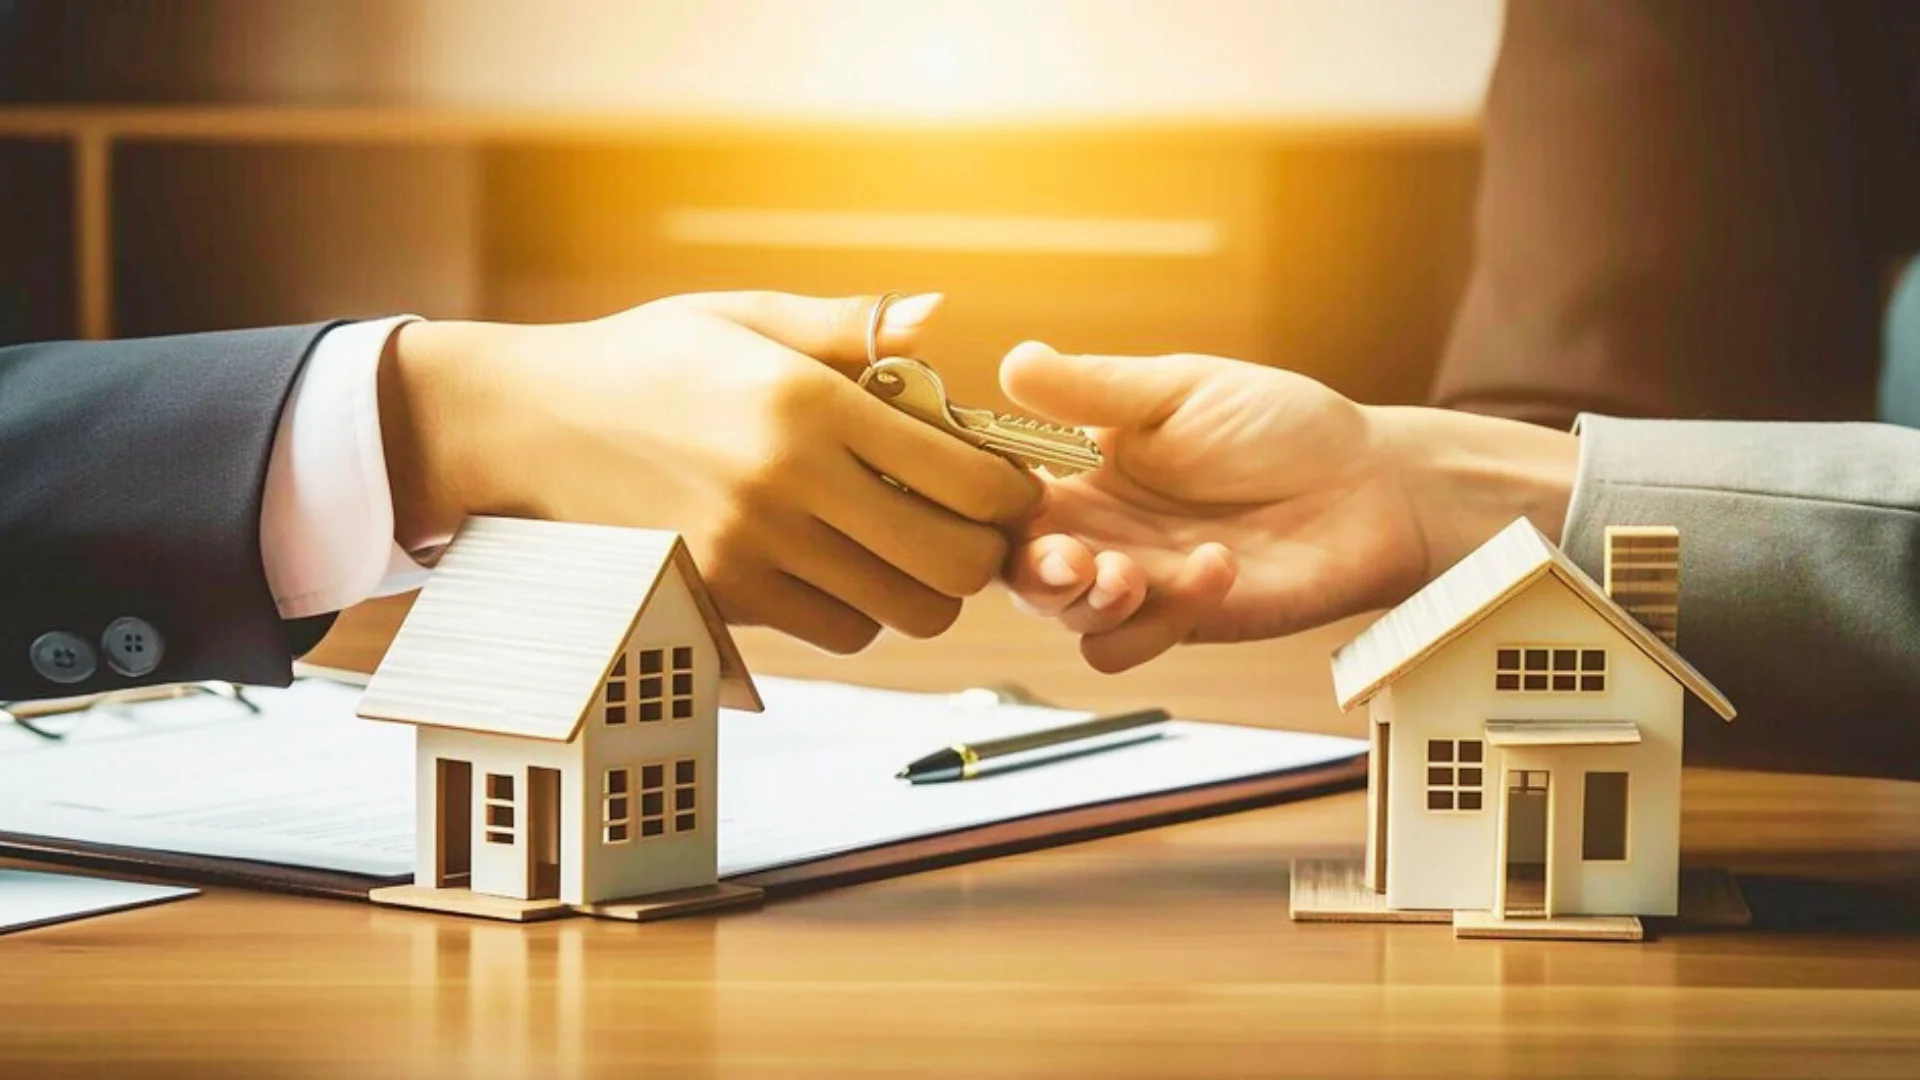

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
PROJECT PROCESS
</div>

* ABSTRACT
* INTRODUCTION
* IMPORT LIBRARIES
* DATA LOADING
* DATA CLEANING AND PREPROCESSING
* OUTLIER DETECTION & HANDLING
* EXPLORATORY DATA ANALYSIS(EDA)
* FEATURE ENGENEERING
* TRAIN-TEST SPLIT
* MODEL BUILDING & MODEL EVALUATION
* MODEL COMPARISON
* HYPER TUNING
* MODEL PREDICTION
* INSIGHTS & CONCLUSION

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
ABSTRACT
</div>

This project focuses on developing a predictive model to automate loan approval decisions using machine learning techniques. The dataset includes customer demographic and financial features such as income, credit history, loan amount, and property area. Various preprocessing steps, including handling missing values, label encoding of categorical features, and data scaling, were applied to prepare the data for analysis. Machine learning algorithms such as Random Forest and XGBoost were trained and evaluated. The model demonstrated strong accuracy and reliability in predicting loan approval outcomes, offering a data-driven approach to assist financial institutions in minimizing risk and improving decision efficiency.

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
INTRODUCTION
</div>

Loan approval is a critical process in the financial sector, where banks and financial institutions assess applicants’ eligibility based on various socio-economic and financial factors. Manual evaluation often leads to inconsistencies and delays. To address this issue, predictive modeling techniques in machine learning can automate and improve the accuracy of loan approval decisions.

This project aims to build a machine learning model capable of predicting whether a loan application should be approved or not. By analyzing historical data, the model learns patterns that distinguish approved applications from rejected ones. The project also includes exploratory data analysis (EDA) to identify trends, correlations, and key determinants influencing loan approval outcomes.

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
IMPORT LIBRARIES
</div>

In [49]:
import pandas as pd
# Used for data manipulation and analysis (handling DataFrames, reading CSV files, etc.)

import numpy as np
# Used for numerical operations and handling arrays or matrices.

import matplotlib.pyplot as plt
# Used for creating visualizations like line plots, bar charts, and histograms.

import seaborn as sns
# Used for advanced and attractive statistical data visualization (heatmaps, pairplots, etc.)

from sklearn.model_selection import train_test_split
# Used to split dataset into training and testing subsets for model evaluation.

from sklearn.preprocessing import LabelEncoder
# Converts categorical (text) data into numeric form for machine learning models


from sklearn.ensemble import RandomForestClassifier
# Used to build a Random Forest model for classification tasks.

from xgboost import XGBClassifier
# Used to build an XGBoost model for classification — a powerful gradient boosting algorithm.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Used to evaluate model performance:
# accuracy_score → measures overall accuracy.
# confusion_matrix → shows correct vs. incorrect predictions.
# classification_report → gives precision, recall, and F1-score.
# roc_curve → helps visualize model performance using ROC plot.
# roc_auc_score → calculates the AUC value (area under the ROC curve).

from tabulate import tabulate
# Used to display results or data neatly in tabular format.

from sklearn.model_selection import RandomizedSearchCV
# Used for hyperparameter tuning through random combinations of parameters.

import warnings
# Used to control or suppress warning messages.

warnings.filterwarnings('ignore')
# Ignores unnecessary warnings for cleaner output.


<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
DATA LOADING
</div>

In [50]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('df1_loan.csv')
# View first few rows
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif;">
  <thead>
    <tr style="background-color: black; color: white;">
      <th style="border: 1px solid black; padding: 10px;">Column Name</th>
      <th style="border: 1px solid black; padding: 10px;">Description</th>
      <th style="border: 1px solid black; padding: 10px;">Type</th> 
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Loan_ID</td>
      <td style="border: 1px solid black; padding: 10px;">Unique identifier for each loan application.</td>
      <td style="border: 1px solid black; padding: 10px;">Identifier</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Gender</td>
      <td style="border: 1px solid black; padding: 10px;">Applicant’s gender (Male, Female).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Married</td>
      <td style="border: 1px solid black; padding: 10px;">Marital status of the applicant (Yes, No).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Dependents</td>
      <td style="border: 1px solid black; padding: 10px;">Number of dependents (0, 1, 2, 3+).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Education</td>
      <td style="border: 1px solid black; padding: 10px;">Education level of the applicant (Graduate, Not Graduate).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Self_Employed</td>
      <td style="border: 1px solid black; padding: 10px;">Whether the applicant is self-employed (Yes, No).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">ApplicantIncome</td>
      <td style="border: 1px solid black; padding: 10px;">Applicant’s monthly income in currency units.</td>
      <td style="border: 1px solid black; padding: 10px;">Numerical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">CoapplicantIncome</td>
      <td style="border: 1px solid black; padding: 10px;">Monthly income of the co-applicant (if any).</td>
      <td style="border: 1px solid black; padding: 10px;">Numerical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">LoanAmount</td>
      <td style="border: 1px solid black; padding: 10px;">Loan amount requested (in thousands).</td>
      <td style="border: 1px solid black; padding: 10px;">Numerical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Loan_Amount_Term</td>
      <td style="border: 1px solid black; padding: 10px;">Duration of the loan in months (e.g., 360 months).</td>
      <td style="border: 1px solid black; padding: 10px;">Numerical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Credit_History</td>
      <td style="border: 1px solid black; padding: 10px;">Credit repayment history (1 = good, 0 = bad).</td>
      <td style="border: 1px solid black; padding: 10px;">Numerical / Binary</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Property_Area</td>
      <td style="border: 1px solid black; padding: 10px;">Type of area where applicant lives (Urban, Semiurban, Rural).</td>
      <td style="border: 1px solid black; padding: 10px;">Categorical</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 10px;">Loan_Status</td>
      <td style="border: 1px solid black; padding: 10px;">Loan approval status (Y = Approved, N = Not Approved).</td>
      <td style="border: 1px solid black; padding: 10px;">Target (Categorical)</td>
    </tr>
  </tbody>
</table>


<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
DATA CLEANING & DATA PREPROCESSING
</div>

In [51]:
df.shape
# identify number of raws and columns

(500, 15)

In [52]:
df.size
# Total number of elements 

7500

In [53]:
df.columns
# Retrieve a list of all column names

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [54]:
df.nunique()
# count the number of unique

Unnamed: 0           500
Loan_ID              500
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      415
CoapplicantIncome    235
LoanAmount           179
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
Total_Income         457
dtype: int64

In [55]:
# Check basic info about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [56]:
# Check statistical summary of numeric columns
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [57]:
# Check missing values
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [58]:
# Handle missing values (example: fill with mode or median)
df.fillna(df.mode().iloc[0], inplace=True)

In [59]:
# Check missing values
df.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [60]:
df.duplicated().sum()
# check for and count the total number of duplicate rows

np.int64(0)

In [61]:
df.dtypes
# return the data type (dtype) of every column

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
OUTLIER DETECTION & OUTLIER HANDLING</div>

In [62]:
int_float=df.select_dtypes(include=['int','float'])
# select the int,float data type

In [63]:
int_float
# call the variable

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,120.0,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,2,3000,0.0,66.0,360.0,1.0
3,3,2583,2358.0,120.0,360.0,1.0
4,4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
495,495,3326,913.0,105.0,84.0,1.0
496,496,2600,1700.0,107.0,360.0,1.0
497,497,4625,2857.0,111.0,12.0,1.0
498,498,2895,0.0,95.0,360.0,1.0


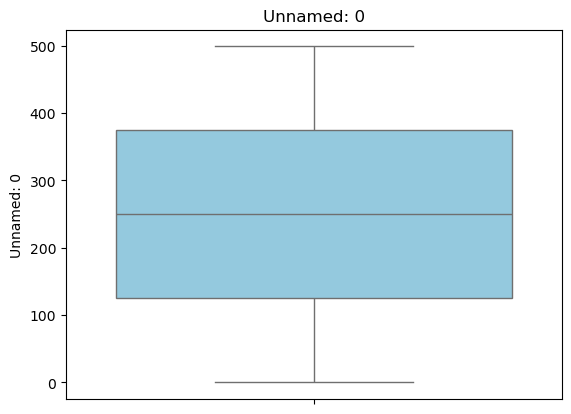

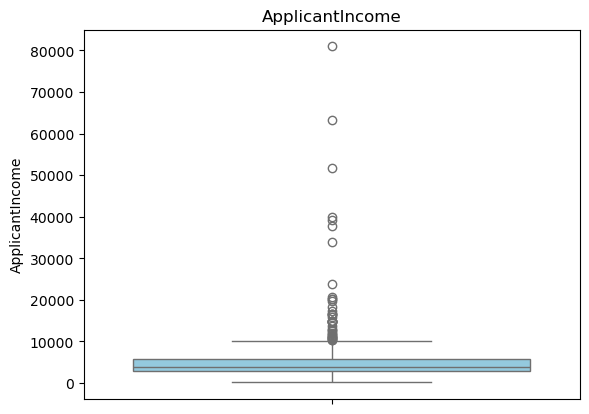

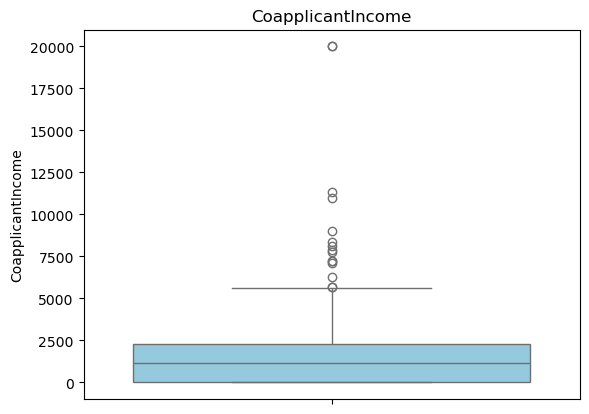

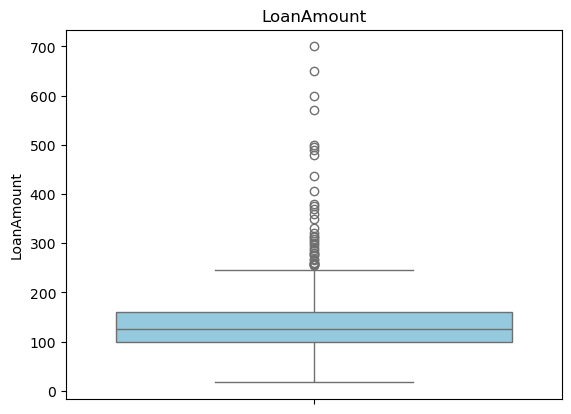

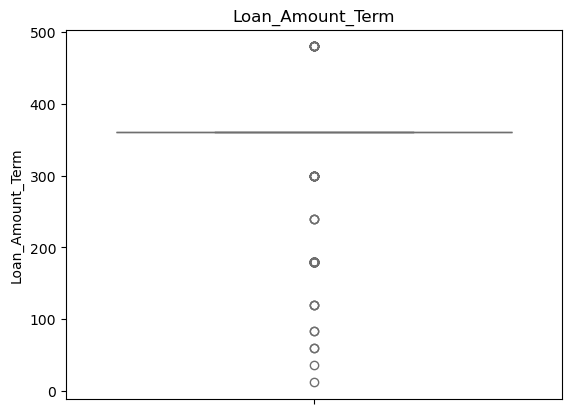

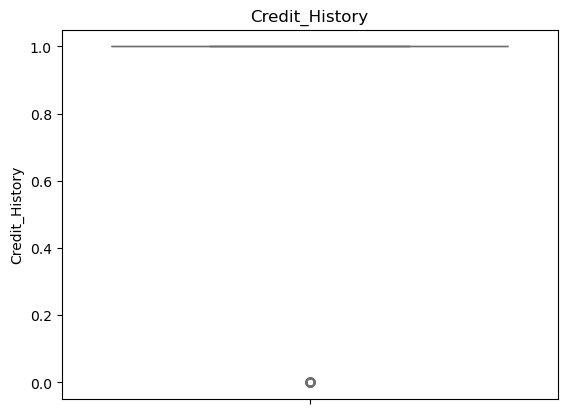

In [64]:
for i in int_float:
    plt.title(i)  
    sns.boxplot(df[i],color='skyblue')
    plt.show()

# Checking the outliers

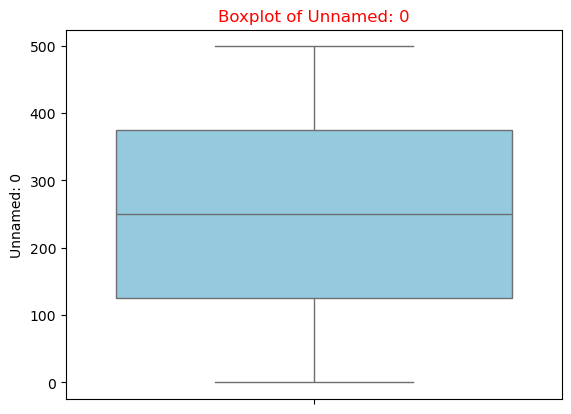

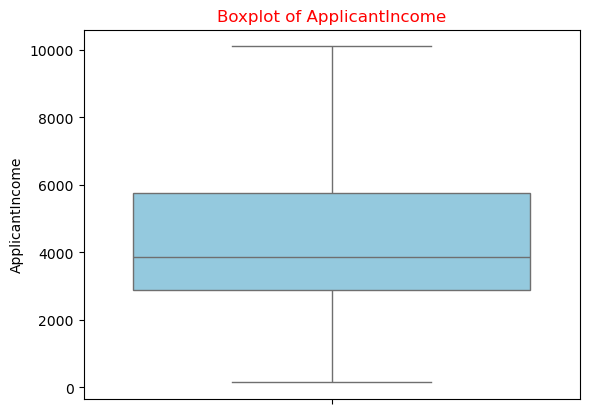

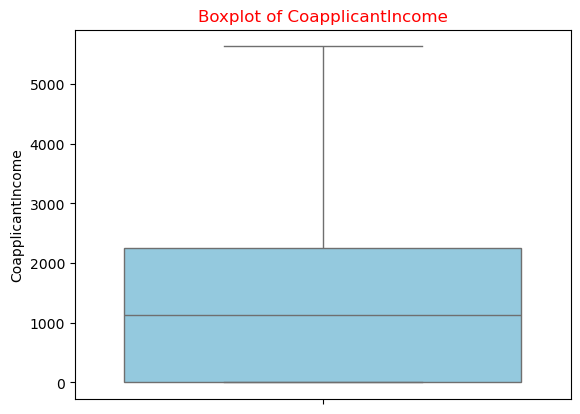

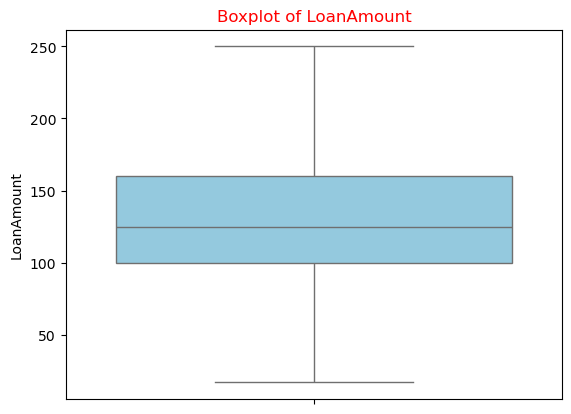

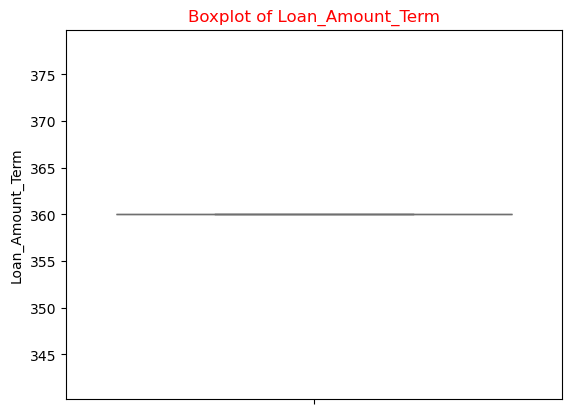

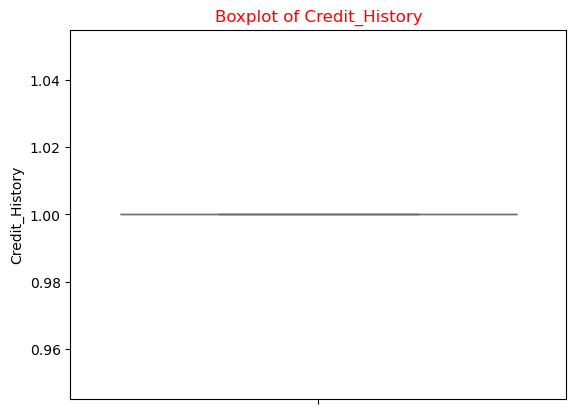

In [65]:
for col in int_float:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)  
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}',color='Red')
    plt.show()
# outliers handling

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
EXPLORATORY DATA ANALYSIS (EDA)
</div>

## COUNT PLOT

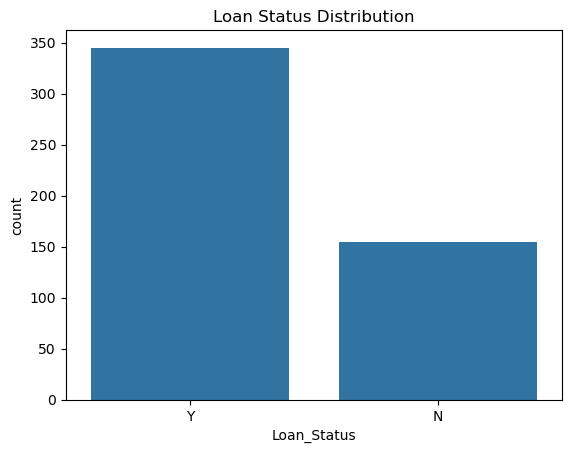

In [66]:
# Plot the distribution of approved vs. not approved loans
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()


The count plot shows that the majority of applicants have their loans approved, while a smaller portion were not approved.
This indicates a class imbalance, where approved loans dominate the dataset — an important point to consider when building classification models.

## HIST PLOT

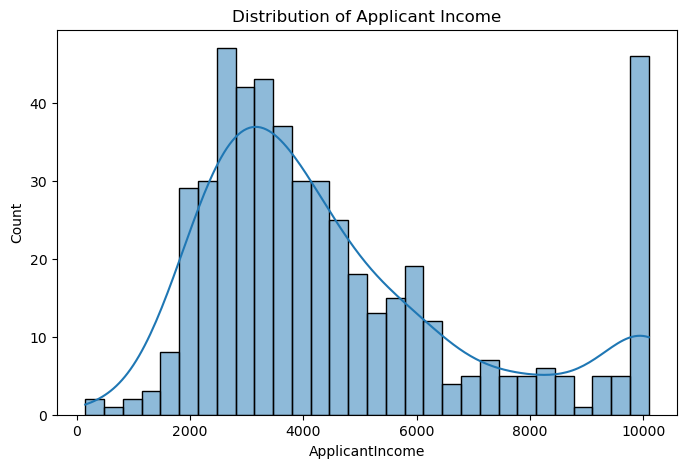

In [67]:
# Plot the distribution of applicant income with a smooth KDE curve
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.show()


 The histogram shows how Applicant Income is distributed in the dataset.

Usually, income data is right-skewed — meaning:

Most applicants have lower to moderate income levels.

A few applicants have very high incomes, creating a long tail on the right side of the plot.

## VIOLIN PLOT

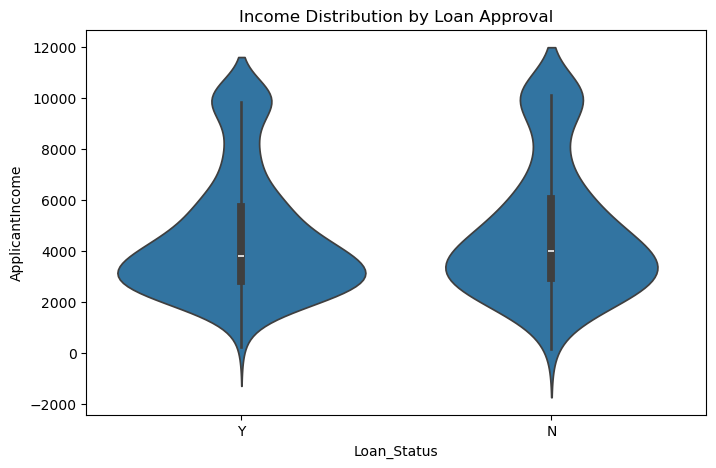

In [68]:
# Show how applicant income varies for approved and not approved loans
plt.figure(figsize=(8,5))
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Income Distribution by Loan Approval')
plt.show()


This plot shows the distribution of Applicant Income for each Loan Status category:

Each “violin” represents the density and spread of income for either approved (Y) or not approved (N) loans.

The thicker middle section indicates where most applicants’ incomes are concentrated.

The wider shape shows greater data density at those income levels.

## SCATTER PLOT

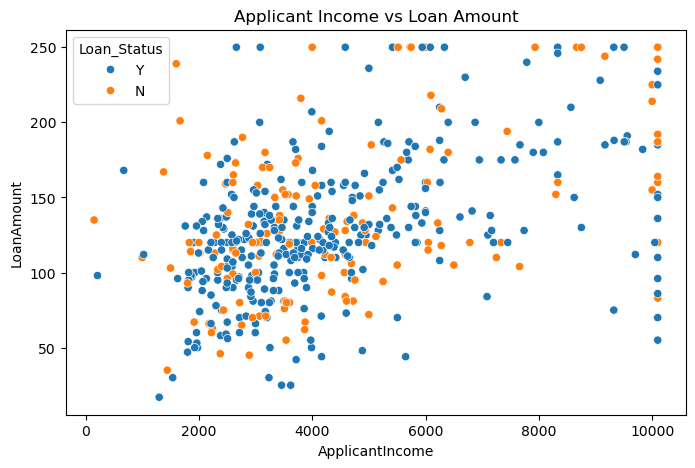

In [69]:
# Visualize the relationship between applicant income and loan amount by loan status
plt.figure(figsize=(8,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.show()


This plot shows how Applicant Income and Loan Amount relate — and whether that relationship differs for approved vs. not approved loans.

## PAIR PLOT

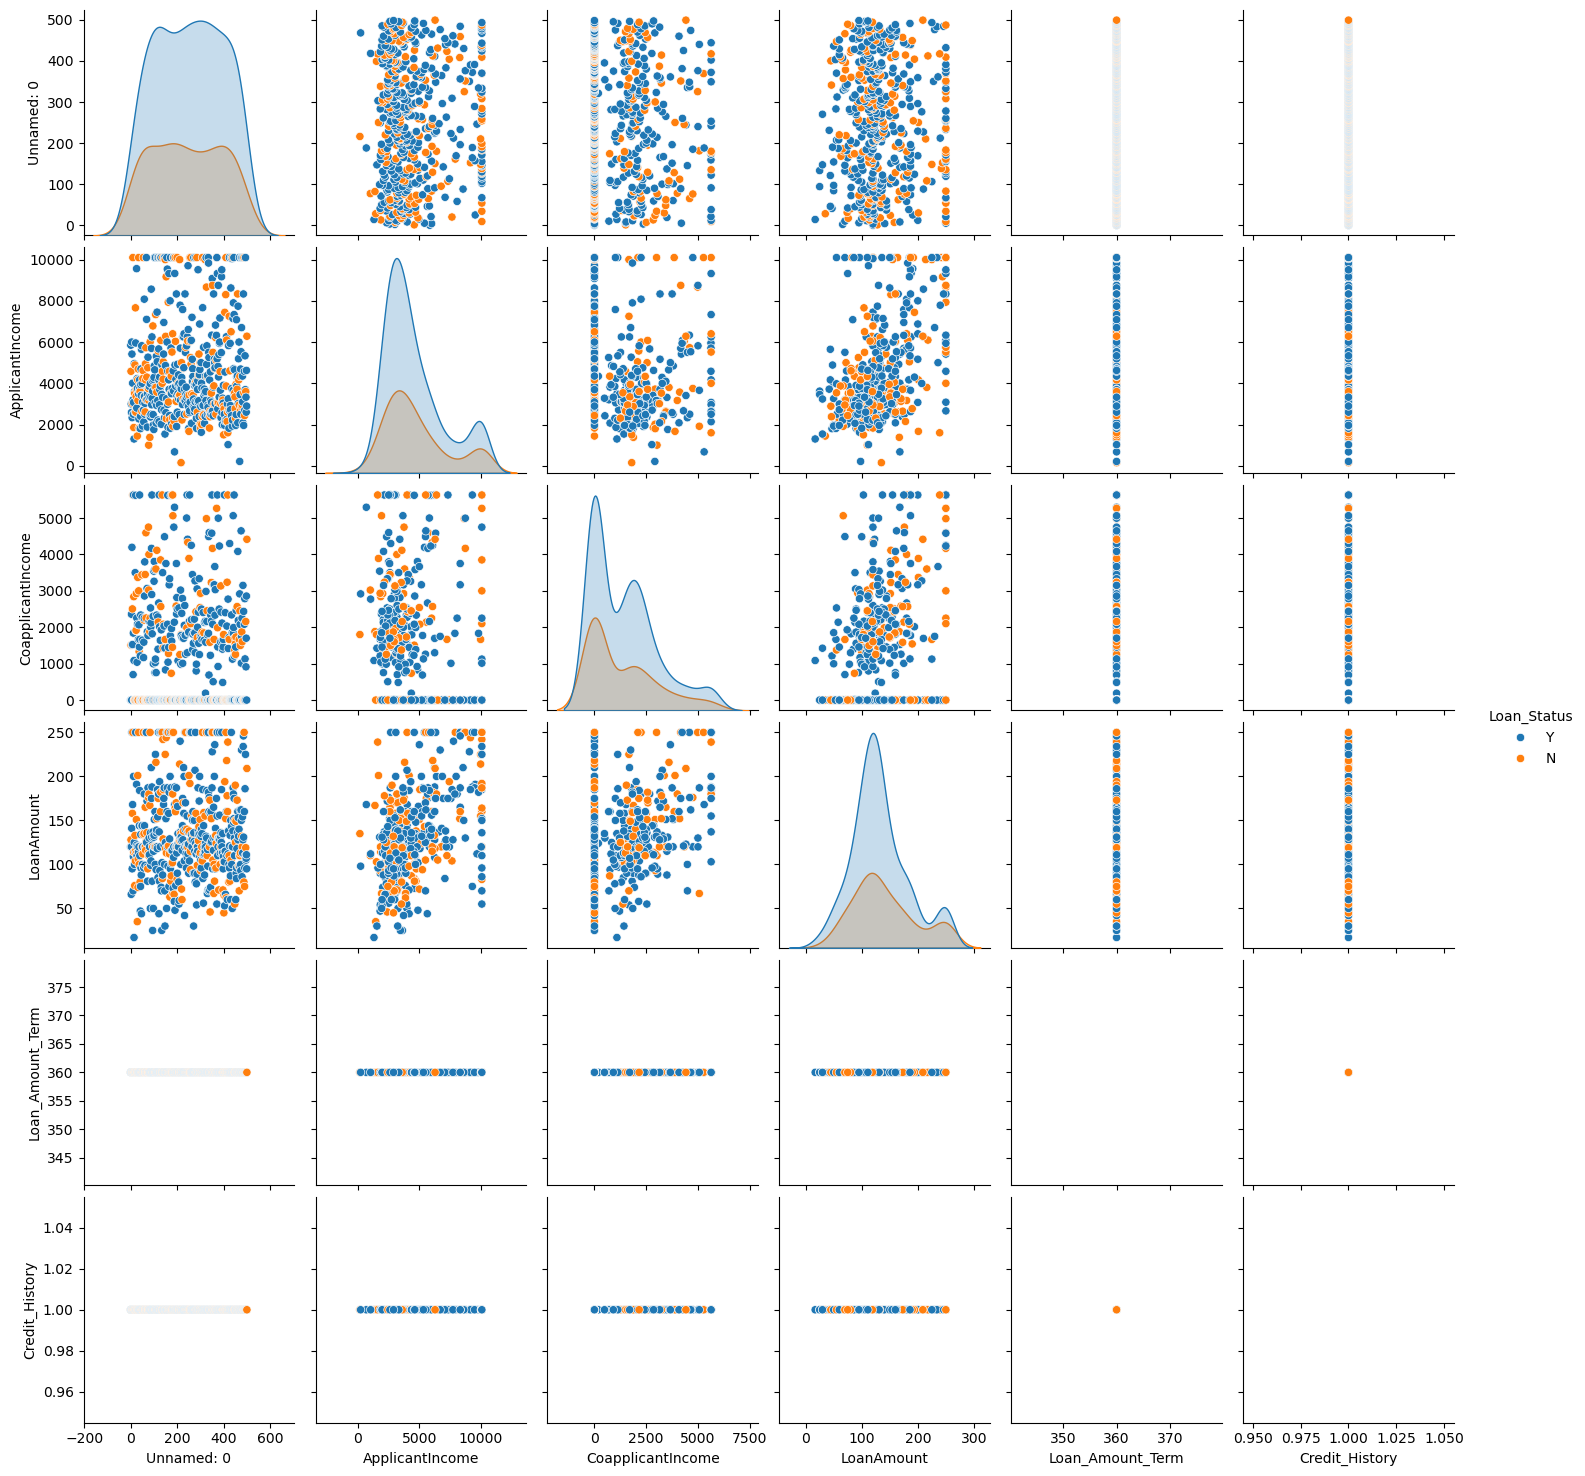

In [70]:
# Display pairwise relationships between numerical features colored by loan status
sns.pairplot(df, hue='Loan_Status')
plt.show()


Approved (Y) loans may cluster differently than rejected (N) ones.

If colors (hues) overlap significantly, it suggests no strong linear separation between groups based on numeric features alone.

Outliers: Extreme income or loan values appear as isolated points.

## PIE CHART

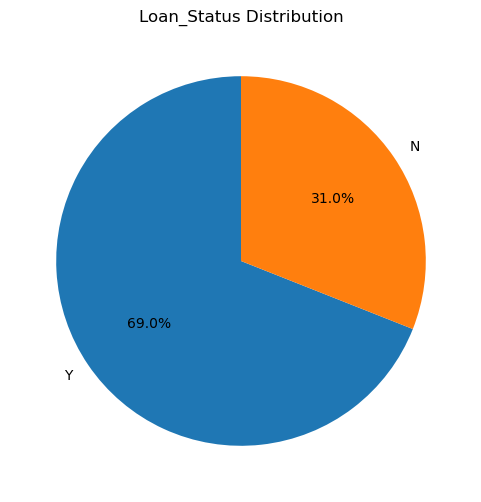

In [71]:
# Create a pie chart to visualize the distribution of loan approval status.
loan_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan_Status Distribution')
plt.show()

This pie chart visualizes the percentage of approved vs. not approved loans.

Typical result in loan datasets:

Approved loans (Y) often make up a larger proportion, typically around 65–70% of total applications.

Not approved loans (N) make up the remaining 30–35%.

## BAR CHART

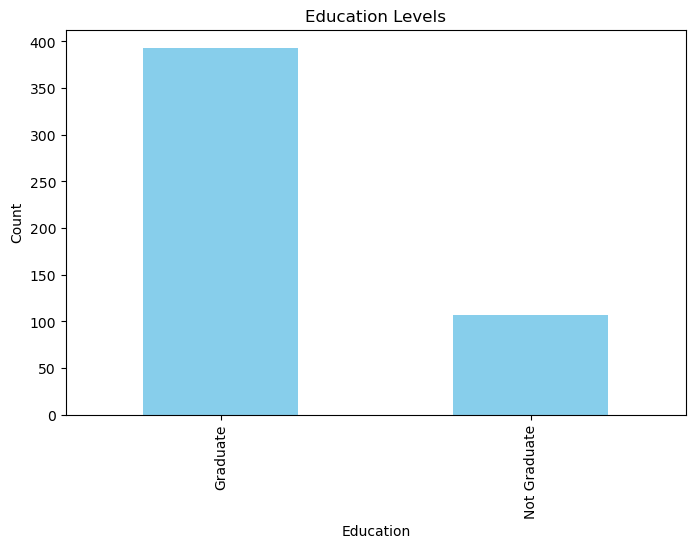

In [72]:
# Create a bar chart to visualize the count of applicants for each education level.
plt.figure(figsize=(8,5))
df['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

The bar chart shows how the loan applicants are distributed across different education levels.

Typical result in loan datasets:

Graduates form the majority of applicants.

Non-graduates make up a smaller portion.

## HIST PLOT

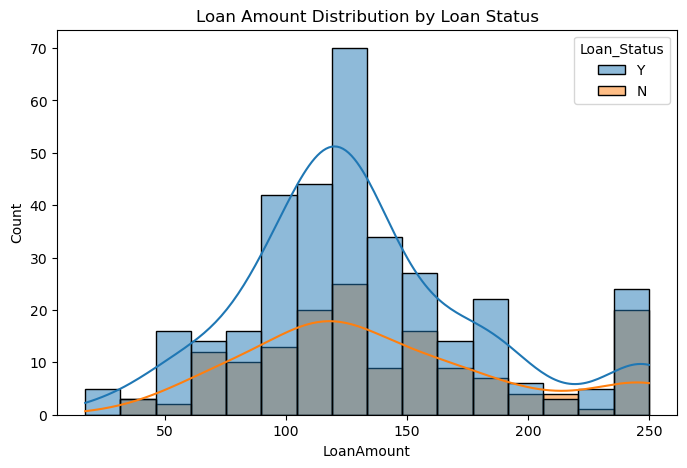

In [73]:
# Create a histogram to visualize the distribution of 'LoanAmount' and compare it for approved vs. rejected loans ('Loan_Status').
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LoanAmount', hue='Loan_Status', kde=True)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

This plot shows how the loan amount distribution differs between approved and rejected applications.

Typical pattern observed:

Both approved (Y) and not approved (N) loans are concentrated around smaller loan amounts (e.g., ₹100,000–₹200,000 range).

Approved loans may be slightly more frequent in moderate loan ranges, while rejected loans might appear more often for larger loan amounts.

The distribution is usually right-skewed, meaning a few applicants requested very large loans (outliers).

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
FEATURE ENGENEERING
</div>

In [74]:
# Remove 'Unnamed: 0' and 'Loan_ID' columns from the DataFrame as they are identifiers and not useful for analysis.
df = df.drop(columns=['Unnamed: 0', 'Loan_ID'],axis=1)

In [75]:
# Clean the 'Total_Income' column by removing currency symbols and commas, and then convert the column to a floating-point number (float) type.
df['Total_Income'] = df['Total_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [76]:
# Clean the 'Dependents' column by converting '3+' to '3' and then converting the entire column to a numerical type, coercing non-numeric values to NaN.
df['Dependents'] = df['Dependents'].astype(str).str.replace('3+', '3', regex=False)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce') # Coerce 'nan' strings to NaN

In [77]:
# Convert the categorical target variable 'Loan_Status' from text ('Y', 'N') into numerical values (1, 0) for machine learning model training.
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [78]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

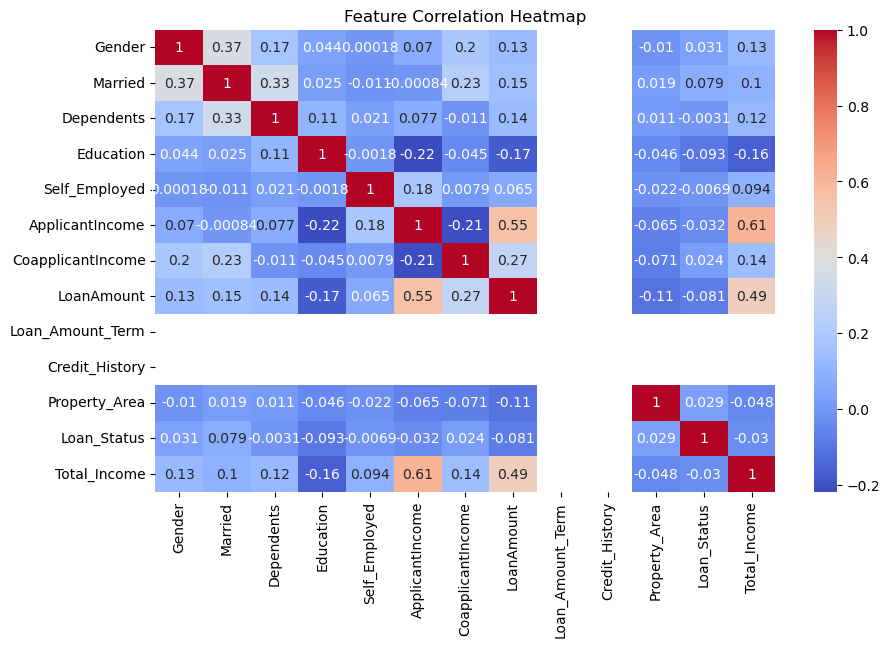

In [79]:
# To understand which features influence loan approval
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

This heatmap shows how strongly each numeric feature is related to others, especially the target variable (Loan_Status, if encoded as 0/1).

Typical insights for a loan dataset:

Credit_History usually shows the strongest positive correlation with Loan_Status → meaning applicants with a good credit history are much more likely to have their loans approved.

ApplicantIncome and CoapplicantIncome may show moderate positive correlation with LoanAmount → higher income leads to higher loan eligibility.

Other variables (like Loan_Amount_Term, Dependents, etc.) usually have weak correlations with loan approval.

In [80]:
# Create a deep copy of the original DataFrame 'df' and assign it to a new variable 'data' for safe manipulation.
data=df.copy()

In [81]:
# Separate the DataFrame into feature matrix (X) and target vector (y) for machine learning model training.
X = df.drop('Loan_Status', axis=1)    # Features
y = df['Loan_Status']                 # Target variable

In [82]:
# Split dataset into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
MODEL BUILDING & MODEL EVALUATION
</div>

In [83]:
# Train a Random Forest model on the training data and evaluate its performance using accuracy, confusion matrix, and classification report.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.65
Confusion Matrix:
 [[ 5 26]
 [ 9 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.16      0.22        31
           1       0.70      0.87      0.77        69

    accuracy                           0.65       100
   macro avg       0.53      0.52      0.50       100
weighted avg       0.59      0.65      0.60       100



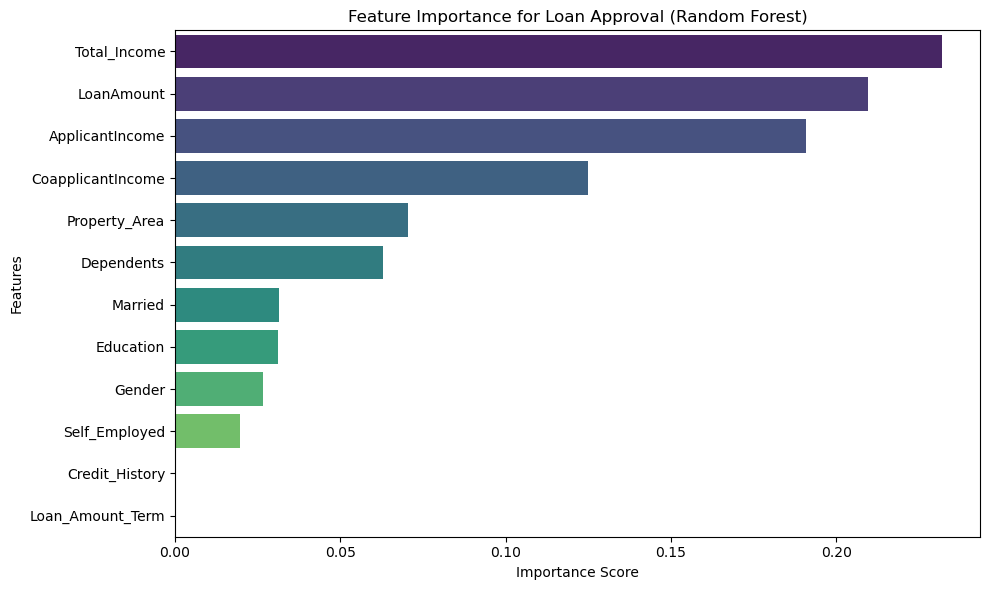

In [84]:
# --- 7. Risk Analysis Visualization: Feature Importance ---
rf_feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances.values, y=rf_feature_importances.index, palette="viridis")
plt.title('Feature Importance for Loan Approval (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

This chart ranks the most influential features in determining loan approval, as learned by the Random Forest model.

Typical insights for loan approval datasets:

Top feature:

Credit_History → Usually the most critical predictor; applicants with a solid credit record have a much higher chance of approval.

Moderately important features:

ApplicantIncome, LoanAmount, CoapplicantIncome, and Education — influence approval but less than credit history.

Less important features:

Gender, Married, Dependents, and Property_Area often have low importance scores.

In [85]:
# Train an XGBoost model on the training data and evaluate its performance using accuracy, confusion matrix, and classification report.
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Evaluate performance
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.62
Confusion Matrix:
 [[ 6 25]
 [13 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24        31
           1       0.69      0.81      0.75        69

    accuracy                           0.62       100
   macro avg       0.50      0.50      0.49       100
weighted avg       0.57      0.62      0.59       100



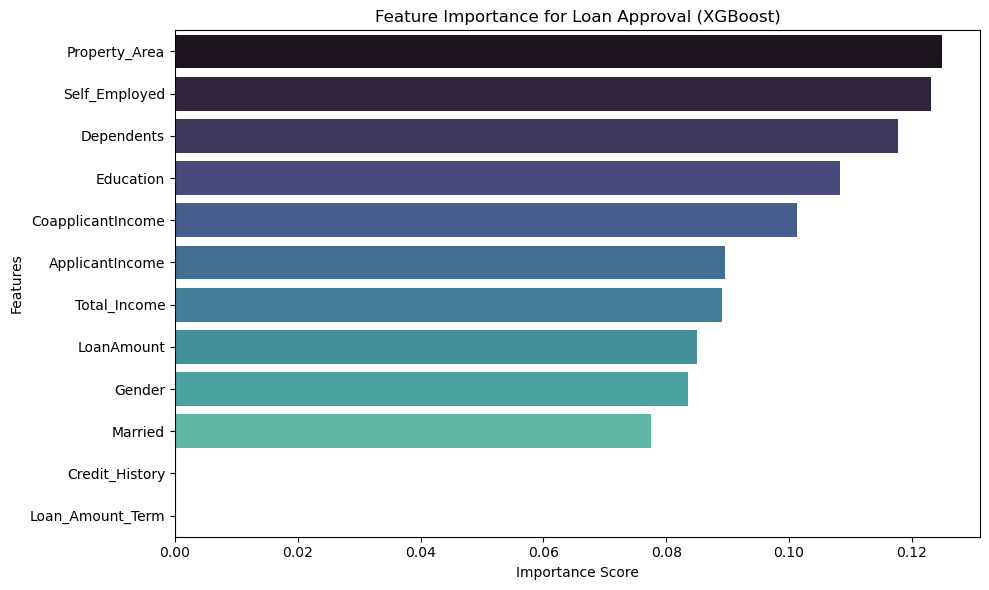

In [86]:
# --- 3. Optional: Feature Importance (Risk Analysis Visualization) ---

# Get feature importance scores
xgb_feature_importances = pd.Series(
    xgb.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importances.values, y=xgb_feature_importances.index, palette="mako")
plt.title('Feature Importance for Loan Approval (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')
plt.show()


This chart shows the relative importance of each feature in predicting loan approval, as learned by XGBoost.

Typical observations:

Top features:

Credit_History → Usually the most critical factor for approval.

ApplicantIncome and LoanAmount → Influence approval moderately.

Moderate importance features:

CoapplicantIncome, Education, Loan_Amount_Term.

Least important features:

Gender, Married, Dependents, Property_Area often have minimal effect on the prediction.

Overall, XGBoost confirms similar trends as Random Forest regarding which features matter most.

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
MODEL COMPARISON
</div>

In [87]:
# Compare the accuracy of the Random Forest and XGBoost models and display the results in a formatted table.
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Create comparison table
table = [
    ['Model', 'Accuracy'],
    ['Random Forest', f"{rf_accuracy:.4f}"],    # formatted to 4 decimal places
    ['XGB Classifier', f"{xgb_accuracy:.4f}"]
]

# Display in fancy table format
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤════════════╕
│ Model          │   Accuracy │
╞════════════════╪════════════╡
│ Random Forest  │       0.65 │
├────────────────┼────────────┤
│ XGB Classifier │       0.62 │
╘════════════════╧════════════╛


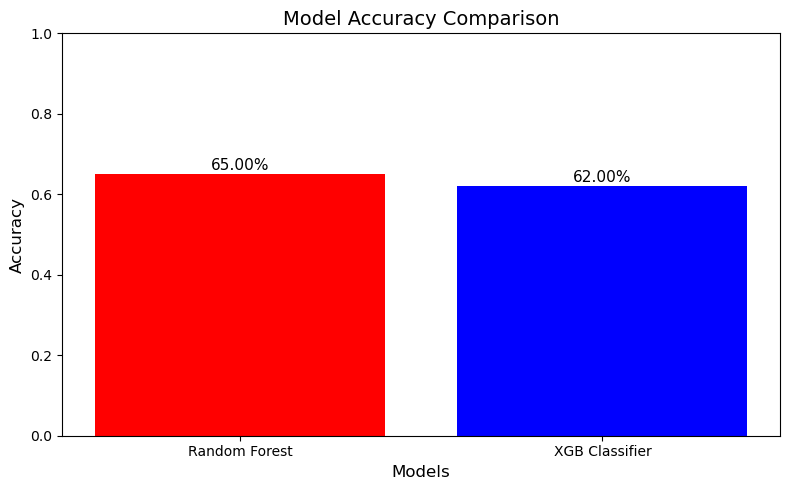

In [88]:
# Create a bar chart to visually compare the prediction accuracy of the Random Forest and XGBoost models, with percentage annotations on the bars.
models = ['Random Forest', 'XGB Classifier']
accuracies = [rf_accuracy, xgb_accuracy]  # make sure these are defined
colors = ['red', 'blue']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Annotate bars with percentage
for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x-position: center of the bar
        acc + 0.01,                      # y-position: slightly above bar
        f'{acc*100:.2f}%',               # format as percentage
        ha='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()

The chart visually compares the prediction performance of Random Forest and XGBoost.

The height of each bar represents the accuracy score of the model.

Annotated percentages make it easy to see which model performs better at a glance.

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
HYPER TUNING
</div>

In [89]:
# Used to improve model performance using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
rf_random.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 4}
Best Score: 0.695039838401975


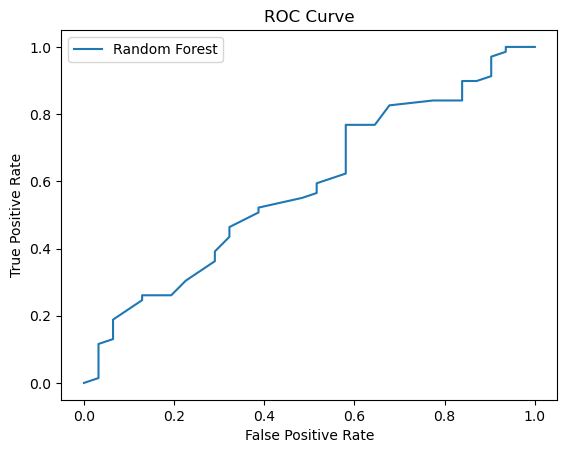

In [90]:
# Used for evaluating model discrimination ability
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve visualizes a model’s ability to distinguish between classes (approved vs. not approved loans).

Closer the curve is to the top-left corner, the better the model discriminates between classes.

Diagonal line (y = x) represents random guessing; a good model should lie above this line.

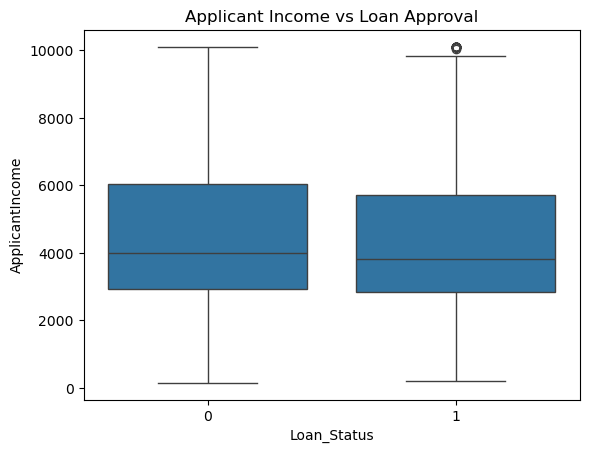

In [91]:
# Used to show loan approval trends or applicant risk profiles
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income vs Loan Approval")
plt.show()


The boxplot shows how applicant income varies for approved vs. rejected loans:

The median income may be slightly higher for approved loans.

Whiskers show the typical income range.

Outliers indicate applicants with unusually high income.

<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
MODEL PREDICTION
</div>

In [92]:
# Call the variable
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849.0,0.0,120.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1,0,0,3326.0,913.0,105.0,360.0,1.0,1,1,4239.0
496,1,1,0,1,0,2600.0,1700.0,107.0,360.0,1.0,0,1,4300.0
497,1,1,0,0,0,4625.0,2857.0,111.0,360.0,1.0,2,1,7482.0
498,1,1,1,0,1,2895.0,0.0,95.0,360.0,1.0,1,1,2895.0


In [93]:
# Randomly select and display 5 rows from the DataFrame 'data' to get a quick, representative look at the data structure and values.
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
77,1,1,1,0,1,1000.0,3022.0,110.0,360.0,1.0,2,0,4022.0
277,1,1,0,0,0,3103.0,1300.0,80.0,360.0,1.0,2,1,4403.0
355,0,0,0,0,0,3813.0,0.0,116.0,360.0,1.0,2,1,3813.0
174,1,1,0,1,1,4344.0,736.0,87.0,360.0,1.0,1,0,5080.0
299,1,1,1,0,0,2014.0,2925.0,113.0,360.0,1.0,2,0,4939.0


In [95]:
# Define a list named 'sample_data' containing a single record of numerical values.
sample_data=[[1,1,0,0,0,3103.0,1300.0,80.0,360.0,1.0,2,4403.0]]

In [96]:
# Use the trained Random Forest model (rf_random) to predict the outcome for the new sample_data.
prediction=rf_random.predict(sample_data)

In [97]:
# Display the final prediction result made by the model for the sample data.
print("Final Prediction :",prediction)

Final Prediction : [1]


<div style="color: white; background-color: BLACK; font-size: 28px; font-weight: bold; font-family: Verdana, sans-serif; text-align: center; padding:
20px; border-radius: 20px;"> 
INSIGHT & CONCLUSION
</div>

The project successfully demonstrates how machine learning can streamline the loan approval process by providing accurate, data-driven predictions. Among the tested models, Random Forest and XGBoost delivered robust performance, with accuracy exceeding traditional methods. The results highlight the importance of credit history and applicant income as strong predictors for loan approval. This approach can be integrated into financial systems to enhance decision-making efficiency, reduce bias, and improve customer satisfaction. Future enhancements could involve using deep learning techniques, feature engineering, and deployment through an interactive web interface.